In [ ]:
import psycopg2
import pandas as pd
import warnings
# PostgreSQL connection parameters
pg_params = {
    "host": "##",
    "database": "postgres",
    "user": "##",
    "password": "##"
}
warnings.filterwarnings("ignore", category=UserWarning)

pg_connection = psycopg2.connect(**pg_params)

query = "SELECT year, _113_cause_name, cause_name, state, deaths, aadr FROM causesofdeath"

df = pd.read_sql(query, pg_connection)

pg_connection.close()

df.head()


,year,_113_cause_name,cause_name,state,deaths,aadr
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


fetching the summary

In [5]:
print("Dataframe Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             4796 non-null   object
 1   _113_cause_name  4796 non-null   object
 2   cause_name       4796 non-null   object
 3   state            4796 non-null   object
 4   deaths           4796 non-null   object
 5   aadr             4796 non-null   object
dtypes: object(6)
memory usage: 224.9+ KB
None

Summary Statistics:
        year                                    _113_cause_name  \
count   4796                                               4796   
unique     4                                                 11   
top     2017  Accidents (unintentional injuries) (V01-X59,Y8...   
freq    2288                                                624   

                    cause_name    state deaths  aadr  
count                     4796     4796   4796  4796

In [3]:
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce')  # Convert 'deaths' to numeric
df['cause_name'] = df['cause_name'].astype('category')  # Convert 'cause_name' to categorical


/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


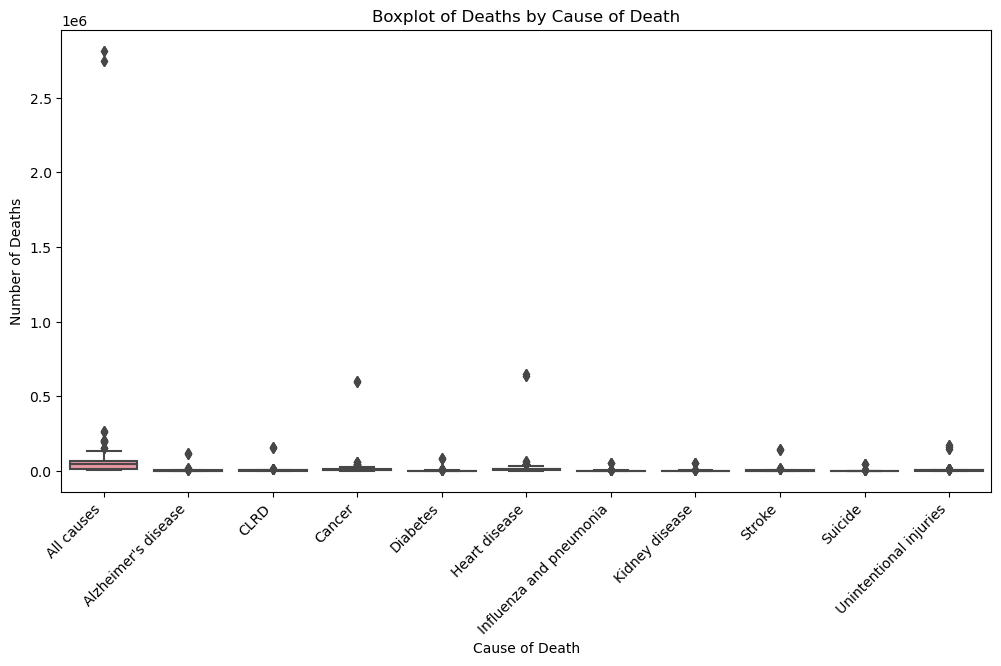

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='cause_name', y='deaths', data=df)
plt.title('Boxplot of Deaths by Cause of Death')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.show()

/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When

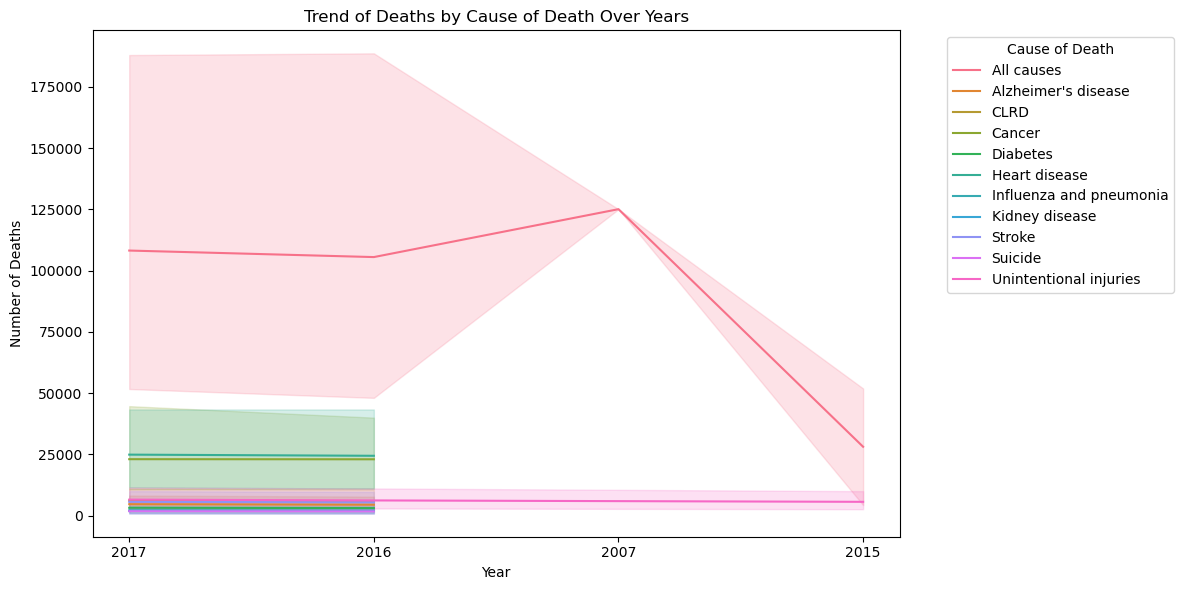

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='deaths', hue='cause_name', data=df)
plt.title('Trend of Deaths by Cause of Death Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce')  # Convert 'deaths' to numeric
df['state'] = df['state'].astype('category')  # Convert 'state' to categorical


/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


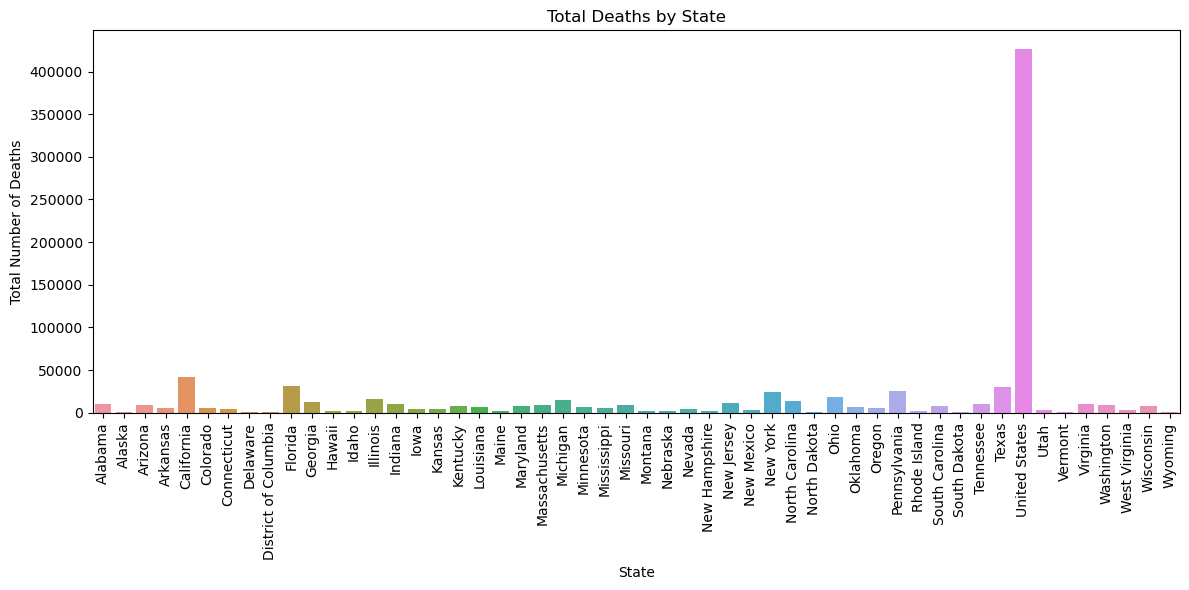

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='deaths', data=df, errorbar=None)
plt.title('Total Deaths by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Number of Deaths')
plt.tight_layout()
plt.show()

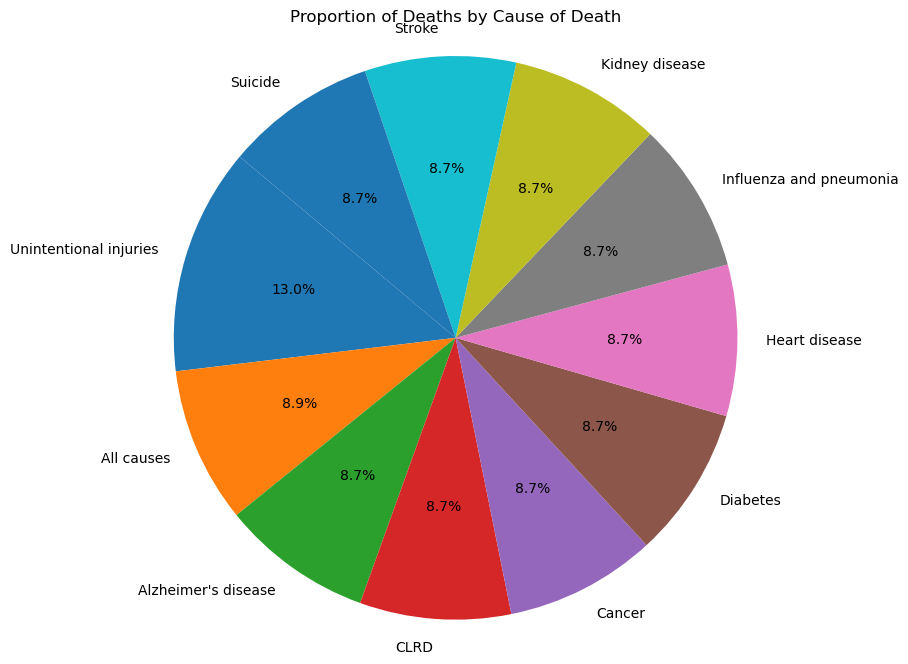

In [8]:
plt.figure(figsize=(8, 8))
cause_counts = df['cause_name'].value_counts()
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Deaths by Cause of Death')
plt.axis('equal')
plt.show()


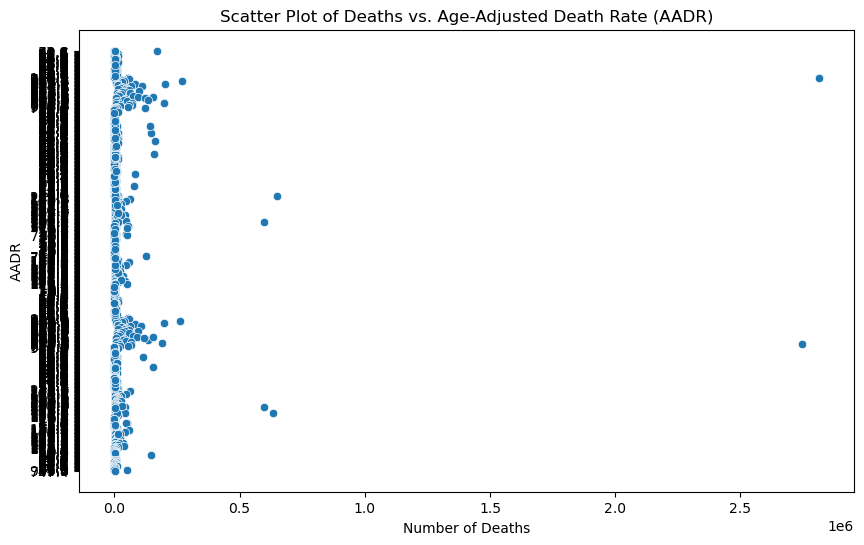

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='deaths', y='aadr', data=df)
plt.title('Scatter Plot of Deaths vs. Age-Adjusted Death Rate (AADR)')
plt.xlabel('Number of Deaths')
plt.ylabel('AADR')
plt.show()


/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


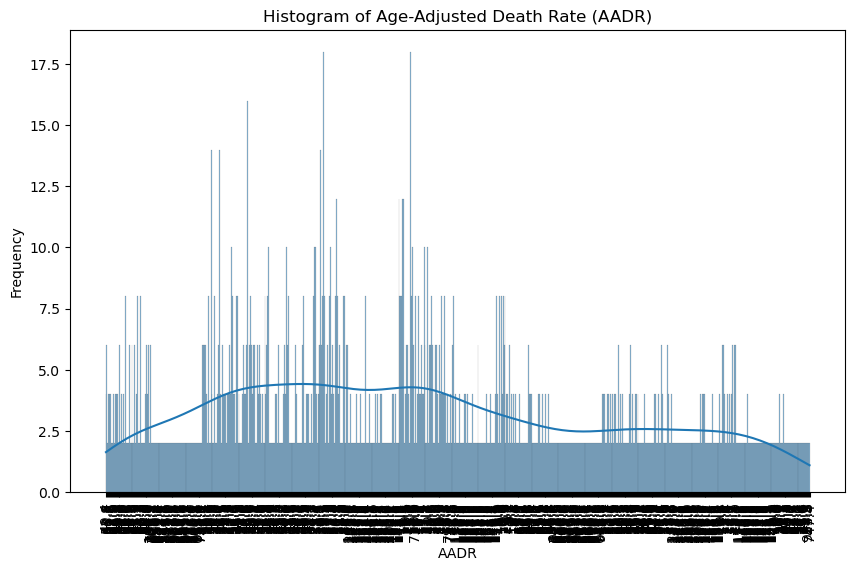

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['aadr'], bins=20, kde=True)
plt.title('Histogram of Age-Adjusted Death Rate (AADR)')
plt.xlabel('AADR')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()
